## 統計的なモデリング


#### 探索的データ分析(Explorary Data Analysis: EDA)
持っているデータセットに対し、直感を得るために、データを調べたり視覚化することを、**探索的データ分析explorary data analysis: EDA**として知られます。基本的にこれはこれは次の二つから構成されます。
- 記述統計学
- データ視覚化

#### 推測統計学(Inferential statistics)
データに基づいた一般化をしたものをモデルと言い、このモデルを用いて、メカニズムを理解したり、将来の数値を予測することが**推測統計学**の仕事です。


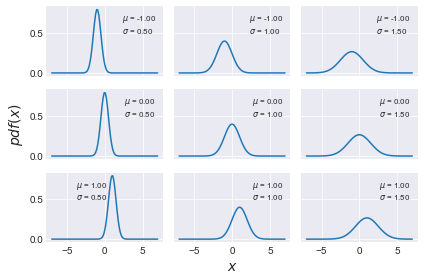

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
plt.style.use('seaborn-darkgrid')
%matplotlib inline

mu_params = [-1, 0, 1]
sd_params = [0.5, 1, 1.5]

x = np.linspace(-7,  7, 100)
f, ax = plt.subplots(len(mu_params), len(sd_params), sharex=True, sharey=True)

for i in range(3):
    for j in range(3):
        mu = mu_params[i]
        sd = sd_params[j]
        y = stats.norm(mu, sd).pdf(x)
        ax[i, j].plot(x, y)
        ax[i, j].plot(0, 0, label="$\\mu$ = {:3.2f}\n$\\sigma$ = {:3.2f}".format(mu, sd), alpha=0)
        ax[i, j].legend(fontsize=8)
        
ax[2,1].set_xlabel('$x$', fontsize=14)
ax[1,0].set_ylabel('$pdf(x)$', fontsize=14)
plt.tight_layout()
plt.savefig('image101.png')
        

## ベイズの定理と統計的推測

- ベイズの定理(Bayes' theorem)
$
p(H|D) = \frac{p(D|H)p(H)}{P(D)}
$

- 乗法定理(Product rule)
$
p(H,D) = p(H|D)p(D) = p(D|H)p(H)
$

$H$を仮説、$D$をデータと読み変えることにすると、ベイズの定理は、データ$D$が与与え得られた元で、仮説$H$の確率をどう計算したら良いのかを教えてくれます。仮説をベイズ定理の中に組み込むためには、確率分布を使う必要があります。この仮説 $H$は狭い意味での仮説のことで、実際は、モデルのパラメータとして定量化することが多いでしょう。例：「ユニコーンは存在する」を仮説として設定する時に、ユニコーンの存在確率を表現する確率モデルを選ぶことで、この仮説を踏み込んだディスガッションができるようになるでしょう。ベイズ定理を議論するための構成する部分の名称は以下がメインです。

- $p(H)$:　事前確率、事前分布(prior)、データ$D$を知る前に私たちがパラメータの値について知っていることを反映したもの。
- $p(D|H)$: 尤度(likelihood)、それは与えられたパラメータの最もらしさを表現したもの。
- $p(H|D)$: 事後確率、事後分布(posterior)、これはベイジアン分析の結果、与えられたパラメータとデータを用いた私たちが知っている全てを反映したもの。
- $p(D)$: エビデンス、証拠(evidence)、これは周辺尤度(marginal likelihood)としても知られます。数式的には、エビデンスは、パラメータがとりうる全ての値にわたって平均化した観測データの確率です。多くの場合、エビデンスを規格化定数(normalization factor)と考えます。それは私達はパラメータの相対的な値について関心があり、絶対的な値に関心があるのでんないからです。このエビデンスを無視すると、ベイズ定理は次のような式になります。

$
p(H|D) \approx　p(D|H)p(H)
$

### 単一パラメータ推論

1. 一般モデルの設定
最初に行うことは、偏りの概念を一般化することです。コイン投げ問題の場合、表と裏が出る確率は0.5でしょう。その偏りをパラメータ$\theta$とし、$N$回投げた時に表が出た総数を$y$とすると、ベイズ定理によって、次式が与えられます。

$
p(\theta|y) \approx p(y|\theta)p(\theta)
$

2. 尤度の選択
1回のコイン投げは他のコイン投げと独立と仮定します。尤度のは2項分布とします。

$
p(y|\theta) = \frac{N!}{y!(N-y)!}\theta^y(1-\theta)^{(N-y)}
$